In [57]:
#hypothesis revision based visual re-ranker with SBERT similarity

In [27]:
import torch
from sentence_transformers import SentenceTransformer, util
#from lm_scorer.models.auto import AutoLMScorer
from sklearn.metrics.pairwise import cosine_similarity

model = SentenceTransformer('roberta-large-nli-stsb-mean-tokens')

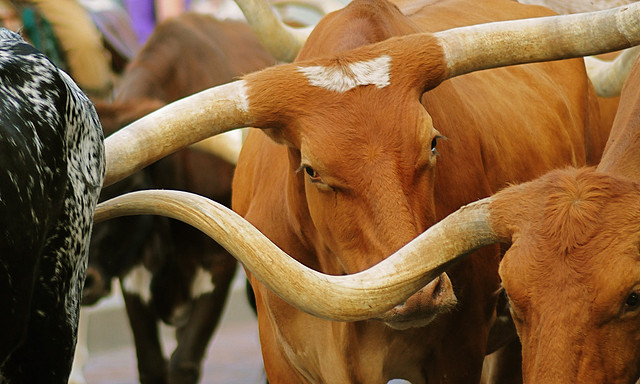

In [59]:
from IPython.core.display import HTML 
Image("COCO_val2014_000000235692.jpg", width=300, height=100)

In [63]:
# Initialize the original hypothesis (ie caption) with common observation (language model ie GPT)
LM = 0.2347288280725479
# Extract the visual classifier (class label)
visual_context = 'ox'
#visual classifier confidence prediction 
classifier_confidence = 0.49095494
# The caption from the baseline 
caption = 'two bulls with horns standing next to each other'

In [96]:
def visual_reranker(LM, visual_context, classifier_confidence, caption):

    	caption_embeddings = model.encode(caption, convert_to_tensor=True)
    	visual_embeddings = model.encode(visual_context, convert_to_tensor=True)
   
    	sim =  cosine_scores = util.pytorch_cos_sim(caption_embeddings, visual_embeddings)
    	sim = sim.cpu().numpy()
    	sim = str(sim)[1:-1]
    	sim = str(sim)[1:-1]

        # hypothesis revision based visual re-ranker
    	score = pow(float(LM),pow((1-float(sim))/(1+ float(sim)),1-float(classifier_confidence)))       
  
    	return score

In [98]:
print(visual_reranker(0.2347288280725479, 'ox', 0.49095494, 'two bulls with horns standing next to each other'))

0.26350009525262974


In [93]:
# original hypothesis without adding visual context iformation
print(LM)

0.2347288280725479


In [99]:
# measuring the revision of original hypothesis after adding visual infromation
def distance(visual_reranker,LM):
    return abs(visual_reranker-LM)

In [100]:
print(distance(0.26350009525262974, LM))

0.028771267180081828
